<a href="https://colab.research.google.com/github/xanasa14/ImagesCorruptioon/blob/master/Unblurrying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo#scrollTo=lmQVC3s97z4z
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
!wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models

/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 346, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 346 (delta 101), reused 154 (delta 53), pack-reused 135
Receiving objects: 100% (346/346), 5.29 MiB | 16.17 MiB/s, done.
Resolving deltas: 100% (163/163), done.
/content/GFPGAN
     |████████████████████████████████| 161 kB 5.4 MB/s 
     |████████████████████████████████| 5.8 MB 39.9 MB/s 
     |████████████████████████████████| 185 kB 42.2 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.9-py3-none-any.whl size=194440 sha256=be1e801cfffbc0e3adf5fa57c2a96f343db4048156c6908998d785df049bcf6e
  Stored in directory: /root/.cache/pip/wheels/92/52/70/341916b8c102f1e4416695e601d4aa71ba34d1080f7aa47cf5
Successfully built basicsr
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 177 kB 10.1 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-no

In [16]:
# upload your own images
import os
from google.colab import files
import shutil

upload_folder = '/content/drive/MyDrive/imaging/pics'

#if os.path.isdir(upload_folder):
#    shutil.rmtree(upload_folder)
#os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving blurry.png to blurry.png
move blurry.png to /content/drive/MyDrive/imaging/pics/blurry.png


In [9]:
'''
import shutil
import os
upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.makedirs(upload_folder, exist_ok=True)
shutil.move('inputs/whole_imgs/Blake_Lively.jpg', 'inputs/upload/Blake_Lively.jpg')
'''


"\nimport shutil\nimport os\nupload_folder = 'inputs/upload'\n\nif os.path.isdir(upload_folder):\n    shutil.rmtree(upload_folder)\nos.makedirs(upload_folder, exist_ok=True)\nshutil.move('inputs/whole_imgs/Blake_Lively.jpg', 'inputs/upload/Blake_Lively.jpg')\n"

In [37]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
!rm -rf results
!python inference_gfpgan.py --upscale 2 --test_path /content/drive/MyDrive/imaging/pics --save_root /content/drive/MyDrive/imaging/outputpics --model_path experiments/pretrained_models/GFPGANCleanv1-NoCE-C2.pth --bg_upsampler realesrgan

!ls /content/drive/MyDrive/imaging/outputpics


Processing blurry.png ...
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
	Tile 1/1
Processing theblurrygirl.png ...
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Processing theblurrykid.png ...
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Results are in the [/content/drive/MyDrive/imaging/outputpics] folder.
cmp  cropped_faces  restored_faces  restored_imgs


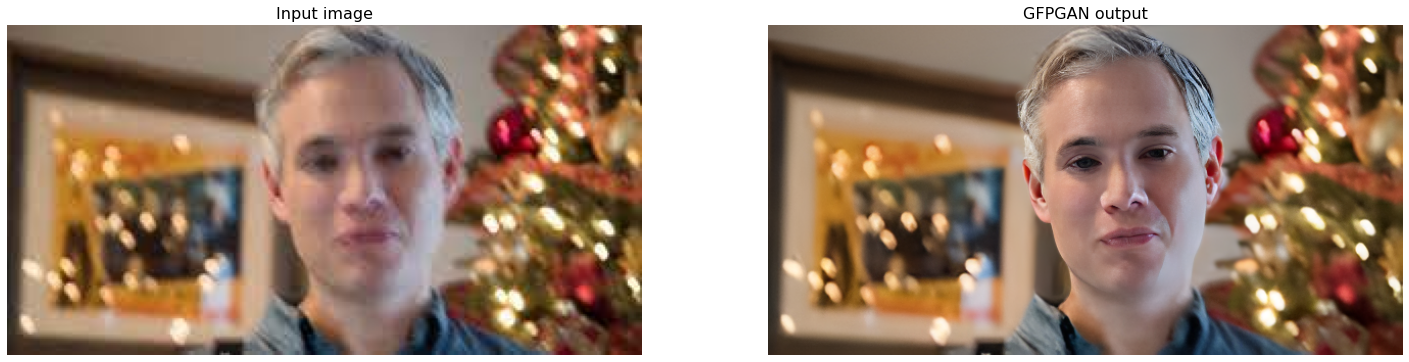

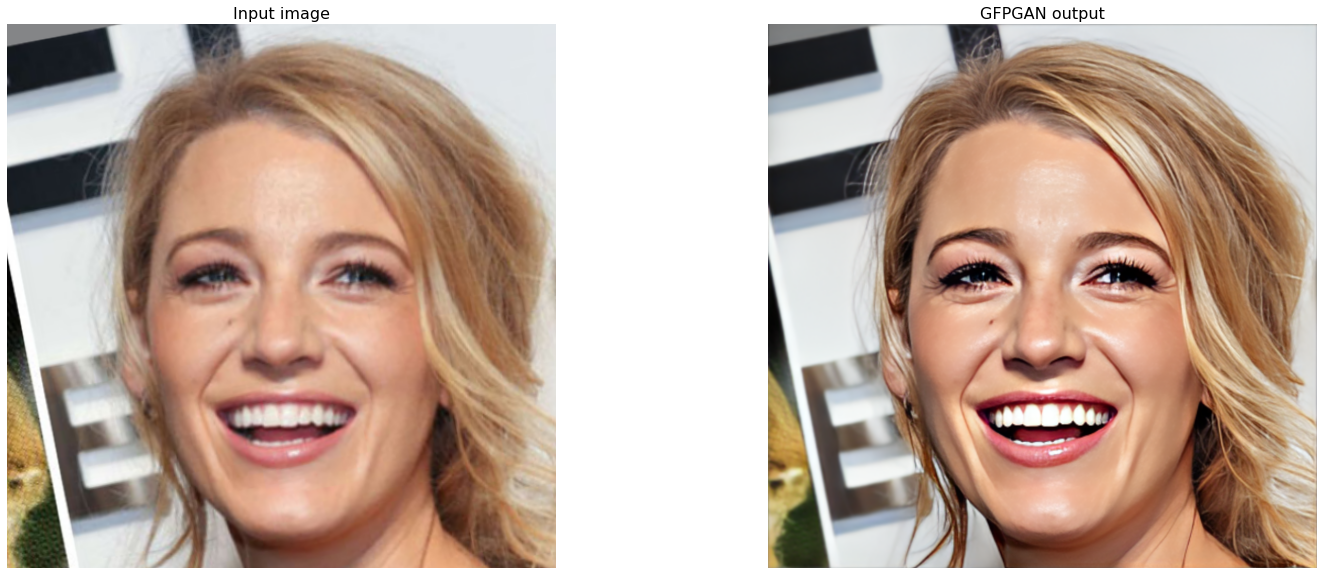

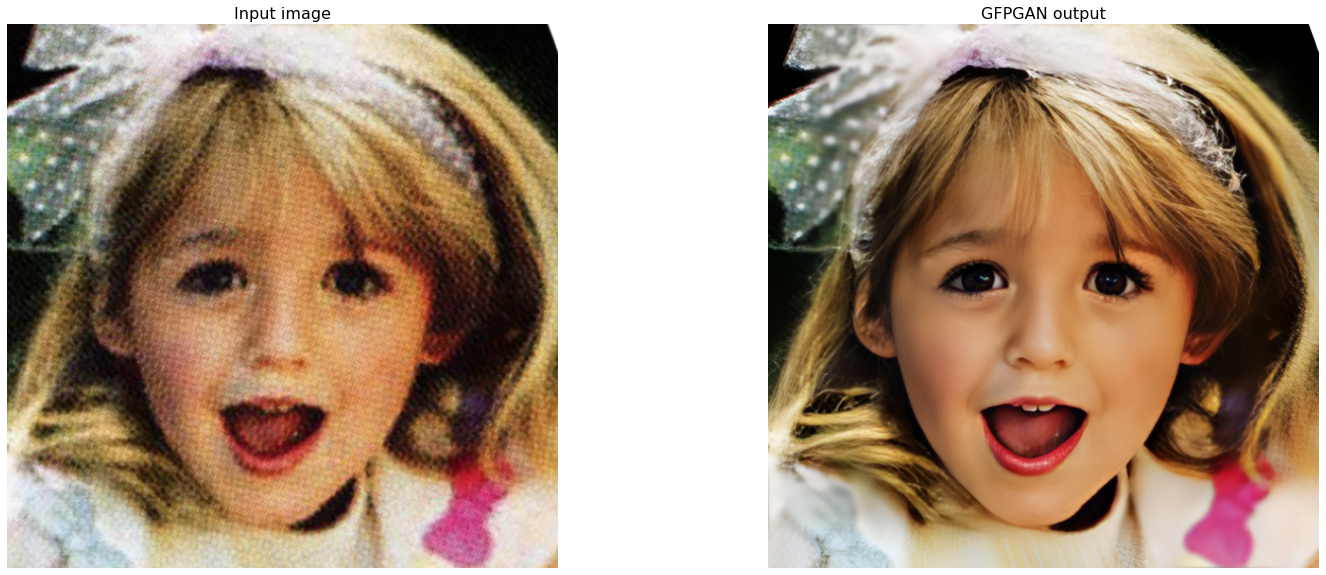

In [38]:
# We first visualize the cropped faces
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = '/content/drive/MyDrive/imaging/pics'
result_folder = '/content/drive/MyDrive/imaging/outputpics/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)


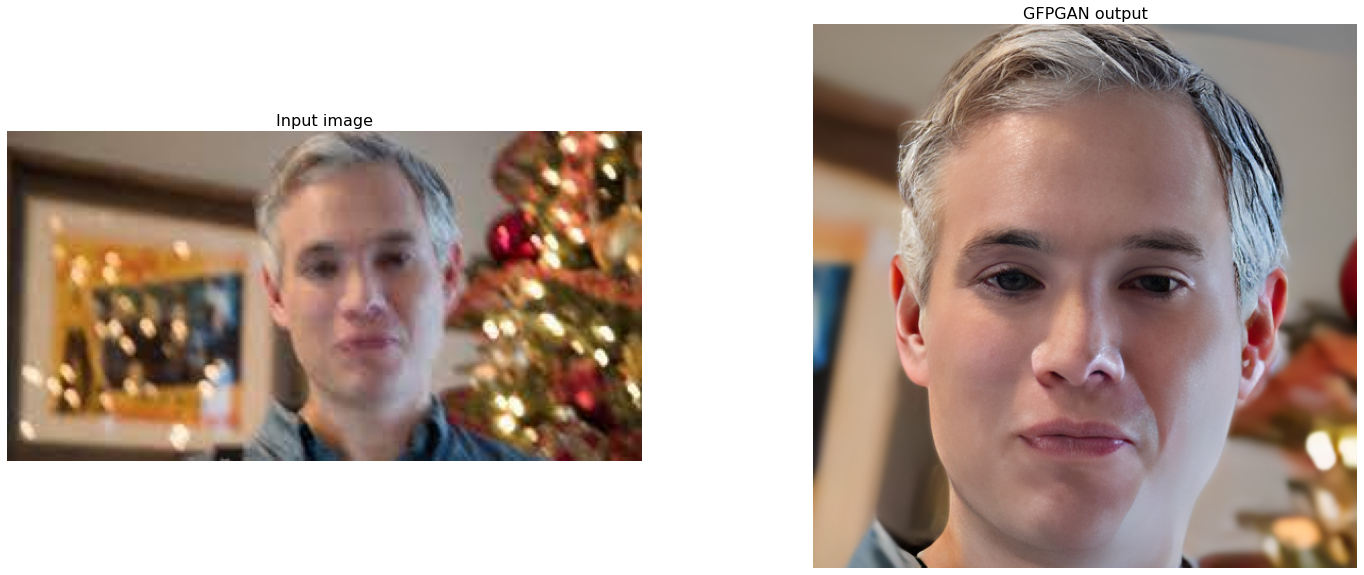

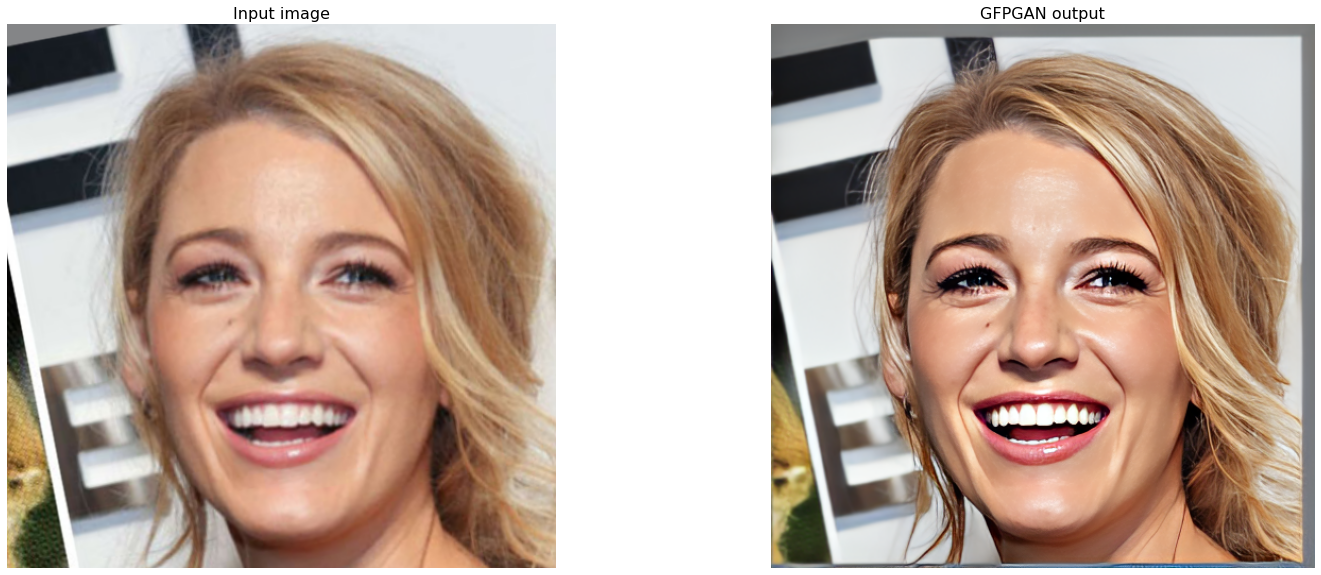

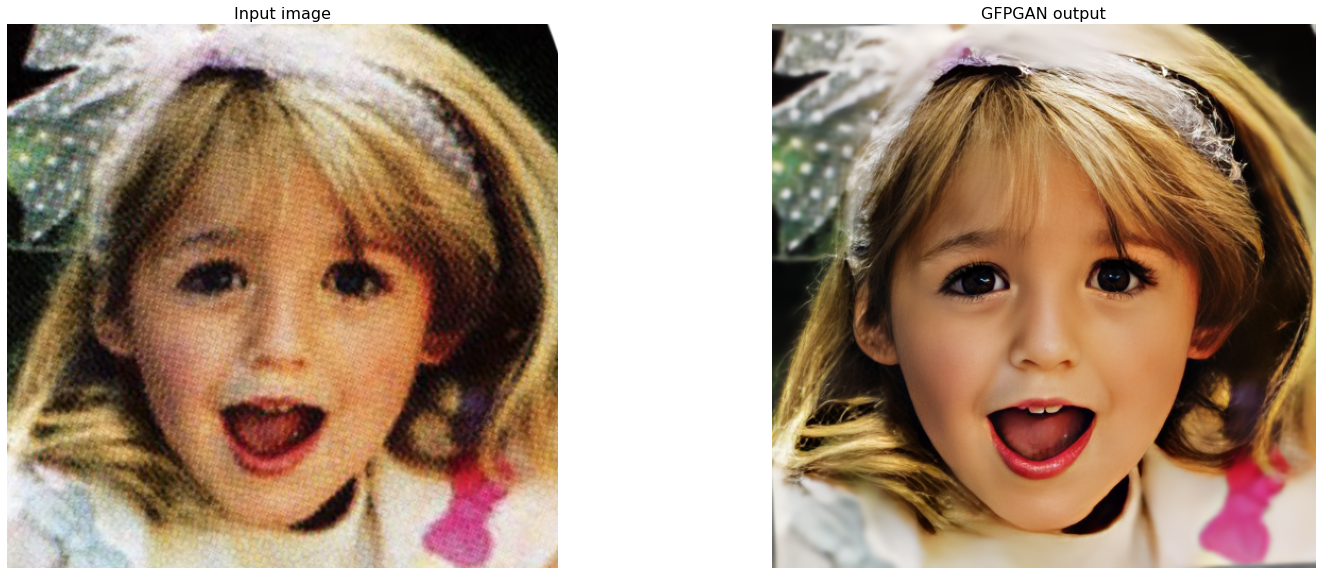

In [39]:
# We then visualize the whole image
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = '/content/drive/MyDrive/imaging/pics'
result_folder = '/content/drive/MyDrive/imaging/outputpics/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)